# Earnings Per Share, Forecast Error and Forecast Dispersion



- [Introduction](#intro)
- [Part I - Data Extraction](#dataextraction)
- [Part II - Analysis](#analysis)


<a id='intro'></a>
## Introduction

Brief Data Collection and Analysis on Earnings per share Data of REITs versus Real Estate Companies


<a id='dataextraction'></a>
## Part I - Data Extraction


In [116]:
#Importing Libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [117]:
#Reading and displaying data
df = pd.read_csv('epsdata.csv')
df.head()

,TICKER,CUSIP,OFTIC,CNAME,ACTDATS,ESTIMATOR,ANALYS,CURRFL,PDF,FPI,...,REVTIMS,ANNDATS,ANNTIMS,ACTUAL,ACTDATS_ACT,ACTTIMS_ACT,ANNDATS_ACT,ANNTIMS_ACT,CURR_ACT,report_curr
0,ACP,45110010,IEP,ICAHN ENTERPRISE,20130410,930,110608,NaN,D,6,...,6:39:59,20130409,23:17:00,2.5260,20130503.0,8:11:52,20130503.0,8:00:00,USD,USD
1,ACP,45110010,IEP,ICAHN ENTERPRISE,20130410,930,110608,NaN,D,7,...,6:39:59,20130409,23:17:00,0.5328,20130807.0,8:08:17,20130807.0,8:00:00,USD,USD
2,ACP,45110010,IEP,ICAHN ENTERPRISE,20130410,930,110608,NaN,D,8,...,6:39:59,20130409,23:17:00,NaN,20131104.0,8:05:48,20131104.0,8:00:00,USD,USD
3,ACP,45110010,IEP,ICAHN ENTERPRISE,20130410,930,110608,NaN,D,1,...,6:39:59,20130409,23:17:00,NaN,20140303.0,10:25:48,20140303.0,8:30:00,USD,USD
4,ACP,45110010,IEP,ICAHN ENTERPRISE,20130410,930,110608,NaN,D,9,...,6:39:59,20130409,23:17:00,NaN,20140303.0,10:25:47,20140303.0,8:30:00,USD,USD


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92229 entries, 0 to 92228
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TICKER       92229 non-null  object 
 1   CUSIP        91997 non-null  object 
 2   OFTIC        90893 non-null  object 
 3   CNAME        91997 non-null  object 
 4   ACTDATS      92229 non-null  int64  
 5   ESTIMATOR    92229 non-null  int64  
 6   ANALYS       92229 non-null  int64  
 7   CURRFL       2719 non-null   object 
 8   PDF          92229 non-null  object 
 9   FPI          92229 non-null  object 
 10  MEASURE      92229 non-null  object 
 11  VALUE        92229 non-null  float64
 12  CURR         63959 non-null  object 
 13  USFIRM       92229 non-null  int64  
 14  FPEDATS      89253 non-null  float64
 15  ACTTIMS      92229 non-null  object 
 16  REVDATS      92229 non-null  int64  
 17  REVTIMS      92229 non-null  object 
 18  ANNDATS      92229 non-null  int64  
 19  ANNT

In [119]:
df.isna().sum()

TICKER             0
CUSIP            232
OFTIC           1336
CNAME            232
ACTDATS            0
ESTIMATOR          0
ANALYS             0
CURRFL         89510
PDF                0
FPI                0
MEASURE            0
VALUE              0
CURR           28270
USFIRM             0
FPEDATS         2976
ACTTIMS            0
REVDATS            0
REVTIMS            0
ANNDATS            0
ANNTIMS            0
ACTUAL         16116
ACTDATS_ACT    10851
ACTTIMS_ACT    10851
ANNDATS_ACT    10851
ANNTIMS_ACT    10851
CURR_ACT       10851
report_curr        0
dtype: int64

In [120]:
#drop only actual column.
df.dropna(subset=['ACTUAL'],axis=0,inplace=True)
df.isna().sum()

TICKER             0
CUSIP            181
OFTIC           1176
CNAME            181
ACTDATS            0
ESTIMATOR          0
ANALYS             0
CURRFL         75869
PDF                0
FPI                0
MEASURE            0
VALUE              0
CURR           25463
USFIRM             0
FPEDATS            0
ACTTIMS            0
REVDATS            0
REVTIMS            0
ANNDATS            0
ANNTIMS            0
ACTUAL             0
ACTDATS_ACT        0
ACTTIMS_ACT        0
ANNDATS_ACT        0
ANNTIMS_ACT        0
CURR_ACT           0
report_curr        0
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76113 entries, 0 to 92221
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TICKER       76113 non-null  object 
 1   CUSIP        75932 non-null  object 
 2   OFTIC        74937 non-null  object 
 3   CNAME        75932 non-null  object 
 4   ACTDATS      76113 non-null  int64  
 5   ESTIMATOR    76113 non-null  int64  
 6   ANALYS       76113 non-null  int64  
 7   CURRFL       244 non-null    object 
 8   PDF          76113 non-null  object 
 9   FPI          76113 non-null  object 
 10  MEASURE      76113 non-null  object 
 11  VALUE        76113 non-null  float64
 12  CURR         50650 non-null  object 
 13  USFIRM       76113 non-null  int64  
 14  FPEDATS      76113 non-null  float64
 15  ACTTIMS      76113 non-null  object 
 16  REVDATS      76113 non-null  int64  
 17  REVTIMS      76113 non-null  object 
 18  ANNDATS      76113 non-null  int64  
 19  ANNT

In [122]:
#Number of Unique IBES Tickers/Companies in the REITs and REAL ESTATE industry
df.TICKER.unique().shape[0]

225

In [123]:
df_REIT = pd.read_csv('REITs.csv')
df_REIT.head()
#df_REIT.info()

,CUSIP FULL,ENTITY NAME,FIRST DATE,IBES TICKER,INCORPORATION COUNTRY,TICKER,CTYPE
0,1945610,ALLIED PROPERTIES REIT,9/18/2003,APU1,NC,AP.UN,REIT
1,1945610,ALLIED PROPERTIES REIT,3/18/2004,APU1,NC,AP,REIT
2,2679120,AMERICAN INDUSTRIAL PPTY REIT,4/16/1998,IND,NaN,IND,REIT
3,3215810,AMREIT,4/15/2004,AM4A,NaN,AMY,REIT
4,3215810,AMREIT,5/20/2004,AM4A,NaN,AMY,REIT


In [124]:
df_REIT.rename(columns={'CUSIP FULL': 'CUSIP', 'ENTITY NAME': 'CNAME', 'TICKER': 'OFFICIAL TICKER', 'IBES TICKER': 'TICKER'}, inplace=True)
df_REIT.head()

,CUSIP,CNAME,FIRST DATE,TICKER,INCORPORATION COUNTRY,OFFICIAL TICKER,CTYPE
0,1945610,ALLIED PROPERTIES REIT,9/18/2003,APU1,NC,AP.UN,REIT
1,1945610,ALLIED PROPERTIES REIT,3/18/2004,APU1,NC,AP,REIT
2,2679120,AMERICAN INDUSTRIAL PPTY REIT,4/16/1998,IND,NaN,IND,REIT
3,3215810,AMREIT,4/15/2004,AM4A,NaN,AMY,REIT
4,3215810,AMREIT,5/20/2004,AM4A,NaN,AMY,REIT


In [125]:
df_REIT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CUSIP                  209 non-null    object
 1   CNAME                  209 non-null    object
 2   FIRST DATE             209 non-null    object
 3   TICKER                 209 non-null    object
 4   INCORPORATION COUNTRY  148 non-null    object
 5   OFFICIAL TICKER        206 non-null    object
 6   CTYPE                  164 non-null    object
dtypes: object(7)
memory usage: 11.6+ KB


In [126]:
df_REIT.CTYPE.fillna('REIT', inplace=True)

In [127]:
df_REIT.isna().sum()

CUSIP                     0
CNAME                     0
FIRST DATE                0
TICKER                    0
INCORPORATION COUNTRY    61
OFFICIAL TICKER           3
CTYPE                     0
dtype: int64

In [128]:
df_Realestate = pd.read_csv('Real Estate Companies.csv')
df_Realestate.head()

,CUSIP FULL,ENTITY NAME,FIRST DATE,IBES TICKER,INCORPORATION COUNTRY,TICKER,CTYPE
0,428910,ACANTHUS REAL ESTATE CORP,8/20/1998,ACR2,NC,ACR,REAL ESTATE
1,428910,ACANTHUS REAL ESTATE CORP,2/18/1999,ACR2,NC,ACR,REAL ESTATE
2,428910,ACANTHUS REAL ESTATE CORP,5/18/2000,ACR2,NC,ACR,REAL ESTATE
3,00844Y10,AGELLAN COMMERCIAL REAL ESTATE I,4/18/2013,RCA1,NC,ACR.UN,REAL ESTATE
4,00844Y10,AGELLAN COMMERCIAL REAL ESTATE I,6/20/2013,RCA1,NC,ACR.UN,REAL ESTATE


In [129]:
df_Realestate.rename(columns={'CUSIP FULL': 'CUSIP', 'ENTITY NAME': 'CNAME', 'TICKER': 'OFFICIAL TICKER', 'IBES TICKER': 'TICKER'}, inplace=True)
df_Realestate.head()

,CUSIP,CNAME,FIRST DATE,TICKER,INCORPORATION COUNTRY,OFFICIAL TICKER,CTYPE
0,428910,ACANTHUS REAL ESTATE CORP,8/20/1998,ACR2,NC,ACR,REAL ESTATE
1,428910,ACANTHUS REAL ESTATE CORP,2/18/1999,ACR2,NC,ACR,REAL ESTATE
2,428910,ACANTHUS REAL ESTATE CORP,5/18/2000,ACR2,NC,ACR,REAL ESTATE
3,00844Y10,AGELLAN COMMERCIAL REAL ESTATE I,4/18/2013,RCA1,NC,ACR.UN,REAL ESTATE
4,00844Y10,AGELLAN COMMERCIAL REAL ESTATE I,6/20/2013,RCA1,NC,ACR.UN,REAL ESTATE


In [130]:
df_Realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CUSIP                  564 non-null    object
 1   CNAME                  564 non-null    object
 2   FIRST DATE             564 non-null    object
 3   TICKER                 564 non-null    object
 4   INCORPORATION COUNTRY  504 non-null    object
 5   OFFICIAL TICKER        539 non-null    object
 6   CTYPE                  203 non-null    object
dtypes: object(7)
memory usage: 31.0+ KB


In [131]:
df_Realestate.CTYPE.fillna('REAL ESTATE', inplace=True)

In [132]:
df_Realestate.isna().sum()

CUSIP                     0
CNAME                     0
FIRST DATE                0
TICKER                    0
INCORPORATION COUNTRY    60
OFFICIAL TICKER          25
CTYPE                     0
dtype: int64

In [133]:
df2 = pd.concat((df_REIT,df_Realestate), axis=0)
df2.head()

,CUSIP,CNAME,FIRST DATE,TICKER,INCORPORATION COUNTRY,OFFICIAL TICKER,CTYPE
0,1945610,ALLIED PROPERTIES REIT,9/18/2003,APU1,NC,AP.UN,REIT
1,1945610,ALLIED PROPERTIES REIT,3/18/2004,APU1,NC,AP,REIT
2,2679120,AMERICAN INDUSTRIAL PPTY REIT,4/16/1998,IND,NaN,IND,REIT
3,3215810,AMREIT,4/15/2004,AM4A,NaN,AMY,REIT
4,3215810,AMREIT,5/20/2004,AM4A,NaN,AMY,REIT


In [134]:
df2.CTYPE.value_counts()

REAL ESTATE    564
REIT           209
Name: CTYPE, dtype: int64

In [135]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 563
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CUSIP                  773 non-null    object
 1   CNAME                  773 non-null    object
 2   FIRST DATE             773 non-null    object
 3   TICKER                 773 non-null    object
 4   INCORPORATION COUNTRY  652 non-null    object
 5   OFFICIAL TICKER        745 non-null    object
 6   CTYPE                  773 non-null    object
dtypes: object(7)
memory usage: 48.3+ KB


In [136]:
dfmerged = pd.merge(df, df2[['CUSIP','TICKER','CNAME','CTYPE']], on=['CUSIP','TICKER','CNAME'], how='left')
dfmerged.head()

,TICKER,CUSIP,OFTIC,CNAME,ACTDATS,ESTIMATOR,ANALYS,CURRFL,PDF,FPI,...,ANNDATS,ANNTIMS,ACTUAL,ACTDATS_ACT,ACTTIMS_ACT,ANNDATS_ACT,ANNTIMS_ACT,CURR_ACT,report_curr,CTYPE
0,ACP,45110010,IEP,ICAHN ENTERPRISE,20130410,930,110608,NaN,D,6,...,20130409,23:17:00,2.5260,20130503.0,8:11:52,20130503.0,8:00:00,USD,USD,NaN
1,ACP,45110010,IEP,ICAHN ENTERPRISE,20130410,930,110608,NaN,D,7,...,20130409,23:17:00,0.5328,20130807.0,8:08:17,20130807.0,8:00:00,USD,USD,NaN
2,ACP,45110010,IEP,ICAHN ENTERPRISE,20140428,930,110608,NaN,D,6,...,20140417,0:10:00,0.0296,20140507.0,9:20:24,20140507.0,8:30:00,USD,USD,NaN
3,ACP,45110010,IEP,ICAHN ENTERPRISE,20140428,930,110608,NaN,D,7,...,20140417,0:10:00,4.2626,20140805.0,9:28:45,20140805.0,8:30:00,USD,USD,NaN
4,ACP,45110010,IEP,ICAHN ENTERPRISE,20140428,930,110608,NaN,D,8,...,20140417,0:10:00,0.1283,20141022.0,19:18:51,20141022.0,13:00:00,USD,USD,NaN


In [137]:
dfmerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90272 entries, 0 to 90271
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TICKER       90272 non-null  object 
 1   CUSIP        90091 non-null  object 
 2   OFTIC        89096 non-null  object 
 3   CNAME        90091 non-null  object 
 4   ACTDATS      90272 non-null  int64  
 5   ESTIMATOR    90272 non-null  int64  
 6   ANALYS       90272 non-null  int64  
 7   CURRFL       244 non-null    object 
 8   PDF          90272 non-null  object 
 9   FPI          90272 non-null  object 
 10  MEASURE      90272 non-null  object 
 11  VALUE        90272 non-null  float64
 12  CURR         52815 non-null  object 
 13  USFIRM       90272 non-null  int64  
 14  FPEDATS      90272 non-null  float64
 15  ACTTIMS      90272 non-null  object 
 16  REVDATS      90272 non-null  int64  
 17  REVTIMS      90272 non-null  object 
 18  ANNDATS      90272 non-null  int64  
 19  ANNT

In [138]:
dfmerged2 = pd.merge(df[['CUSIP','TICKER','ESTIMATOR','ANALYS','FPI','VALUE','ACTUAL','ANNDATS_ACT','CNAME', 'USFIRM','CURR']], df2[['CUSIP','TICKER','CNAME','CTYPE']], on=['CUSIP','TICKER','CNAME'], how='left')
dfmerged2.head()

,CUSIP,TICKER,ESTIMATOR,ANALYS,FPI,VALUE,ACTUAL,ANNDATS_ACT,CNAME,USFIRM,CURR,CTYPE
0,45110010,ACP,930,110608,6,3.5719,2.5260,20130503.0,ICAHN ENTERPRISE,1,NaN,NaN
1,45110010,ACP,930,110608,7,1.5590,0.5328,20130807.0,ICAHN ENTERPRISE,1,NaN,NaN
2,45110010,ACP,930,110608,6,1.6873,0.0296,20140507.0,ICAHN ENTERPRISE,1,NaN,NaN
3,45110010,ACP,930,110608,7,2.6641,4.2626,20140805.0,ICAHN ENTERPRISE,1,NaN,NaN
4,45110010,ACP,930,110608,8,2.5753,0.1283,20141022.0,ICAHN ENTERPRISE,1,NaN,NaN


In [139]:
dfmerged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90272 entries, 0 to 90271
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CUSIP        90091 non-null  object 
 1   TICKER       90272 non-null  object 
 2   ESTIMATOR    90272 non-null  int64  
 3   ANALYS       90272 non-null  int64  
 4   FPI          90272 non-null  object 
 5   VALUE        90272 non-null  float64
 6   ACTUAL       90272 non-null  float64
 7   ANNDATS_ACT  90272 non-null  float64
 8   CNAME        90091 non-null  object 
 9   USFIRM       90272 non-null  int64  
 10  CURR         52815 non-null  object 
 11  CTYPE        18338 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 9.0+ MB


In [140]:
df_clean = dfmerged2[['TICKER', 'CNAME', 'ESTIMATOR', 'ANALYS', 'FPI', 'VALUE', 'CURR', 'USFIRM', 'ACTUAL', 'ANNDATS_ACT', 'CTYPE']].copy()
df_clean.head()

,TICKER,CNAME,ESTIMATOR,ANALYS,FPI,VALUE,CURR,USFIRM,ACTUAL,ANNDATS_ACT,CTYPE
0,ACP,ICAHN ENTERPRISE,930,110608,6,3.5719,NaN,1,2.5260,20130503.0,NaN
1,ACP,ICAHN ENTERPRISE,930,110608,7,1.5590,NaN,1,0.5328,20130807.0,NaN
2,ACP,ICAHN ENTERPRISE,930,110608,6,1.6873,NaN,1,0.0296,20140507.0,NaN
3,ACP,ICAHN ENTERPRISE,930,110608,7,2.6641,NaN,1,4.2626,20140805.0,NaN
4,ACP,ICAHN ENTERPRISE,930,110608,8,2.5753,NaN,1,0.1283,20141022.0,NaN


In [141]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90272 entries, 0 to 90271
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TICKER       90272 non-null  object 
 1   CNAME        90091 non-null  object 
 2   ESTIMATOR    90272 non-null  int64  
 3   ANALYS       90272 non-null  int64  
 4   FPI          90272 non-null  object 
 5   VALUE        90272 non-null  float64
 6   CURR         52815 non-null  object 
 7   USFIRM       90272 non-null  int64  
 8   ACTUAL       90272 non-null  float64
 9   ANNDATS_ACT  90272 non-null  float64
 10  CTYPE        18338 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 8.3+ MB


In [142]:
#df_clean2 = df_clean[df_clean.isnull().any(axis=1)]

In [143]:
#df_clean2.to_csv('output.csv',index=False)


<a id='analysis'></a>
## Part II - Analysis 

In [144]:
#Unique number of companies from the IBES data pulled from wrds
df_clean.TICKER.unique().shape[0]

225

#### There was 225 unique earnings per share security in the Real Estate and REITs industry

In [145]:
#Ratio of US firms to international firms
df_clean.query('USFIRM==1').shape[0]

37457

In [146]:
df_clean.query('USFIRM==0').shape[0]

52815

([<matplotlib.patches.Wedge at 0x1d7851391c0>,
 [Text(1.076768803364579, 0.22487539683303026, 'US'),
  Text(-1.0767687928374008, -0.22487544724021552, 'International')],
 [Text(0.5873284381988613, 0.12265930736347104, '6.6%'),
  Text(-0.5873284324567639, -0.12265933485829936, '93.4%')])

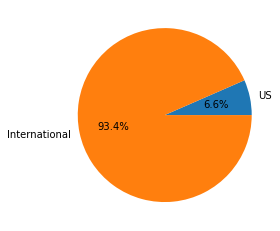

In [147]:
plt.pie([3748,53443],labels=['US','International'],autopct='%1.1f%%')

#### Ratio of US REIT and Real Estate Companies to International REIT and Real Estate companies

In [148]:
#Distribution of FPI values
df_clean.FPI.value_counts()

1    24071
2    22738
3    14027
6     7461
7     6881
8     6365
9     5677
4     2251
5      738
E       58
F        2
I        1
G        1
H        1
Name: FPI, dtype: int64

<AxesSubplot:xlabel='FPI', ylabel='Count'>

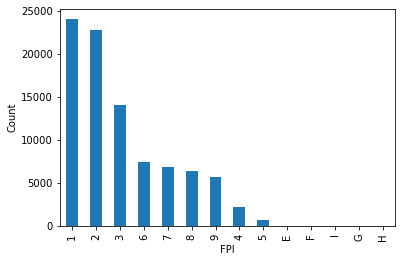

In [149]:
df_clean.FPI.value_counts().plot(kind='bar', xlabel="FPI", ylabel="Count")

In [150]:
#Analyst with the most predictions from 2015 to 2021
df_clean.ANALYS.value_counts()

33026     3351
48707     2453
51570     1619
96397     1527
110255    1323
          ... 
147254       1
115986       1
115508       1
138767       1
73387        1
Name: ANALYS, Length: 1588, dtype: int64

#### Analyst 3351 had the most eps predictions from 2005 to 2021

In [151]:
#Broker with the most predictions from 2015 to 2021
df_clean.ESTIMATOR.value_counts()

608     3336
1331    2977
190     2676
3149    2440
192     2350
        ... 
2955       1
3381       1
2561       1
4510       1
1202       1
Name: ESTIMATOR, Length: 474, dtype: int64

#### Broker with the most eps predictions is given by id 3336

In [152]:
#Most predicted eps currency from 2015 to 2021
df_clean.CURR.value_counts()

SGD    11090
CAD     8509
EUR     7870
CNY     6335
HKD     3997
THB     2966
MYR     2928
AUD     2200
JPY     2093
SAR      952
INR      839
MXN      746
BPN      556
KRW      395
ZAR      335
AED      277
USD      272
TWD      193
KWD       92
BGN       47
JOD       41
SEK       37
QAR       29
CZK        6
NOK        4
VND        4
GBP        2
Name: CURR, dtype: int64

#### Most predicted eps currency is SGD(singapore dollar)

In [153]:
#Company with the highest number of esp predictions from 2015 to 2021
df_clean.CNAME.value_counts()

HEALTH CARE REIT    12105
BREITBURN ENERGY     2546
K-REIT ASIA          1965
BLACKSTONE MORTG     1869
WHITESTONE REIT      1851
                    ...  
AL-TAHDITH FOR R        1
F&C UK REAL             1
TRASTOR REAL EST        1
JIANGXI ZHONGJIA        1
DR REAL ESTATE A        1
Name: CNAME, Length: 383, dtype: int64

#### Health Care REIT is the most predicted company eps

In [154]:
#summary statistics of actual from 2015 to 2021
df_clean.ACTUAL.describe()

count    90272.000000
mean         5.842509
std         44.765241
min       -573.260000
25%          0.108000
50%          0.410000
75%          1.330000
max       2678.249200
Name: ACTUAL, dtype: float64

In [155]:
#summary statistics of predicted from 2015 to 2021
df_clean.VALUE.describe()

count    90272.000000
mean         6.958566
std         79.874954
min       -715.410000
25%          0.167400
50%          0.474800
75%          1.410000
max       4312.280000
Name: VALUE, dtype: float64

#### Summary statistics for actual and predicted eps is given above

In [156]:
#df_clean['ANNDATS_ACT'].astype(str)
df_clean['ANNDATS_ACT']=pd.to_datetime(df_clean['ANNDATS_ACT'], format='%Y%m%d')
df_clean['year'] = df_clean['ANNDATS_ACT'].dt.year
df_clean['month'] = df_clean['ANNDATS_ACT'].dt.month

In [157]:
df_clean.head()

,TICKER,CNAME,ESTIMATOR,ANALYS,FPI,VALUE,CURR,USFIRM,ACTUAL,ANNDATS_ACT,CTYPE,year,month
0,ACP,ICAHN ENTERPRISE,930,110608,6,3.5719,NaN,1,2.5260,2013-05-03,NaN,2013,5
1,ACP,ICAHN ENTERPRISE,930,110608,7,1.5590,NaN,1,0.5328,2013-08-07,NaN,2013,8
2,ACP,ICAHN ENTERPRISE,930,110608,6,1.6873,NaN,1,0.0296,2014-05-07,NaN,2014,5
3,ACP,ICAHN ENTERPRISE,930,110608,7,2.6641,NaN,1,4.2626,2014-08-05,NaN,2014,8
4,ACP,ICAHN ENTERPRISE,930,110608,8,2.5753,NaN,1,0.1283,2014-10-22,NaN,2014,10


In [158]:
df_clean.year.value_counts()

2013    8156
2014    7882
2015    7605
2012    7595
2016    6880
2011    6631
2017    5699
2010    5370
2018    5294
2019    4904
2020    4845
2021    4828
2009    4217
2008    3303
2022    2723
2007    2452
2006    1523
2005     365
Name: year, dtype: int64

<AxesSubplot:xlabel='ANNDATS_ACT Years', ylabel='Count'>

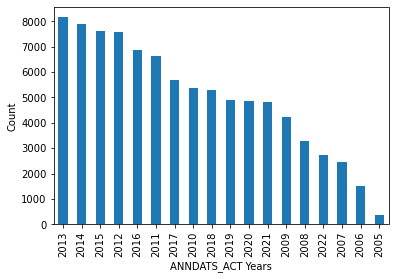

In [159]:
df_clean.year.value_counts().plot(kind='bar', xlabel='ANNDATS_ACT Years',ylabel='Count')

<AxesSubplot:xlabel='ANNDATS_ACT Months', ylabel='Count'>

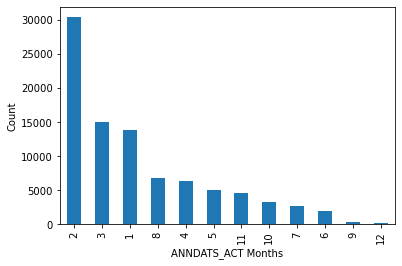

In [160]:
df_clean.month.value_counts().plot(kind='bar', xlabel='ANNDATS_ACT Months',ylabel='Count')

#### Calculation of Forecast Error and Forecast Dispersion for REITs

In [161]:
#Calculating Signed Earnings Forecast Error and Forecast Dispersion for REIT
df_cleanREIT = df_clean.query('CTYPE=="REIT"')
df_cleanREIT['ERROR'] = df_cleanREIT['ACTUAL'] - df_cleanREIT['VALUE']
df_cleanREIT.head()

<ipython-input-161-7b5b25eeefa7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanREIT['ERROR'] = df_cleanREIT['ACTUAL'] - df_cleanREIT['VALUE']


,TICKER,CNAME,ESTIMATOR,ANALYS,FPI,VALUE,CURR,USFIRM,ACTUAL,ANNDATS_ACT,CTYPE,year,month,ERROR
1637,AMRZ,AMREIT INC,930,110255,1,0.39,NaN,1,0.39,2013-02-19,REIT,2013,2,0.00
1638,AMRZ,AMREIT INC,930,110255,6,0.08,NaN,1,0.09,2013-02-19,REIT,2013,2,0.01
1640,AMRZ,AMREIT INC,930,110255,1,0.32,NaN,1,0.83,2014-02-18,REIT,2014,2,0.51
1641,AMRZ,AMREIT INC,930,110255,1,0.63,NaN,1,0.83,2014-02-18,REIT,2014,2,0.20
1642,AMRZ,AMREIT INC,3039,5845,1,0.74,NaN,1,0.83,2014-02-18,REIT,2014,2,0.09


In [162]:
df_cleanREIT.shape[0]

17868

#### SUMMARY STATISTICS FOR REITs

In [164]:
df_cleanREIT.describe()

,ESTIMATOR,ANALYS,VALUE,USFIRM,ACTUAL,year,month,ERROR
count,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000,17868.000000
mean,1027.625979,88205.989143,0.939293,0.785426,0.841236,2013.150045,3.874580,-0.098058
std,989.324992,44444.747374,3.723945,0.410538,3.338444,3.652143,3.333516,1.291436
min,4.000000,0.000000,-7.764000,0.000000,-5.900000,2005.000000,1.000000,-43.299900
25%,192.000000,45405.000000,0.102000,1.000000,0.058000,2011.000000,2.000000,-0.150000
50%,608.000000,89631.000000,0.350000,1.000000,0.280000,2013.000000,2.000000,-0.016000
75%,1523.000000,123015.000000,1.100000,1.000000,0.980000,2015.000000,5.000000,0.050000
max,3965.000000,185832.000000,77.138000,1.000000,64.280000,2022.000000,11.000000,26.155000


#### Signed Forecast Error for REITs is -0.098

In [165]:
#signed Forecast error
df_cleanREIT['ERROR'].sum()/df_cleanREIT['ERROR'].shape[0]

-0.09805752742332664

#### Signed Forecast Dispersion for REITs is 3.96 

In [166]:
#Forecast Dispersion
df_cleanREIT['VALUE'].std()/abs(df_cleanREIT['VALUE'].mean())

3.9646249075681292

#### CALCULATION OF FORECAST ERROR AND FORECAST DISPERSION ERROR FOR REAL ESTATE COMPANIES

In [167]:
df_cleanRealestate = df_clean.query('CTYPE=="REAL ESTATE"')
df_cleanRealestate['ERROR'] = df_cleanRealestate['ACTUAL'] - df_cleanRealestate['VALUE']
df_cleanRealestate.head()

<ipython-input-167-eab1324403fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanRealestate['ERROR'] = df_cleanRealestate['ACTUAL'] - df_cleanRealestate['VALUE']


,TICKER,CNAME,ESTIMATOR,ANALYS,FPI,VALUE,CURR,USFIRM,ACTUAL,ANNDATS_ACT,CTYPE,year,month,ERROR
35113,WRE,WASH REAL ESTATE,353,110697,1,1.83,NaN,1,0.96,2006-02-16,REAL ESTATE,2006,2,-0.87
35114,WRE,WASH REAL ESTATE,353,110697,6,0.26,NaN,1,0.26,2006-02-16,REAL ESTATE,2006,2,0.00
35115,WRE,WASH REAL ESTATE,353,111521,6,0.24,NaN,1,0.25,2006-04-18,REAL ESTATE,2006,4,0.01
35116,WRE,WASH REAL ESTATE,353,110697,7,0.25,NaN,1,0.25,2006-04-18,REAL ESTATE,2006,4,0.00
35117,WRE,WASH REAL ESTATE,353,111521,7,0.25,NaN,1,0.18,2006-07-19,REAL ESTATE,2006,7,-0.07


In [169]:
df_cleanRealestate.shape[0]

470

In [170]:
df_clean.CTYPE.value_counts()

REIT           17868
REAL ESTATE      470
Name: CTYPE, dtype: int64

#### SUMMARY STATISTICS FOR REAL ESTATE

In [172]:
df_cleanRealestate.describe()

,ESTIMATOR,ANALYS,VALUE,USFIRM,ACTUAL,year,month,ERROR
count,470.00000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,1249.46383,96115.021277,0.332352,0.665957,0.495945,2012.044681,3.557447,0.163593
std,865.54873,21047.528099,0.340311,0.472157,0.776809,5.030835,2.698001,0.722241
min,98.00000,72986.000000,-0.440000,0.000000,-0.330000,2005.000000,2.000000,-0.870000
25%,557.00000,72986.000000,0.102275,0.000000,0.120000,2008.000000,2.000000,-0.064275
50%,873.00000,92213.000000,0.310000,1.000000,0.360000,2010.000000,2.000000,0.009100
75%,1928.00000,112821.000000,0.470225,1.000000,0.581800,2017.000000,3.000000,0.116150
max,3472.00000,138042.000000,4.040000,1.000000,4.750000,2022.000000,11.000000,4.690000


#### Distribution of REITs against Real Estate Companies

<AxesSubplot:ylabel='CTYPE'>

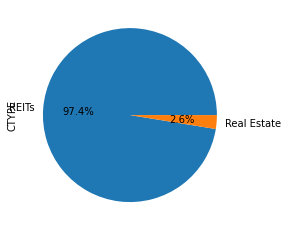

In [173]:
df_clean.CTYPE.value_counts().plot(kind='pie', labels=['REITs','Real Estate'],autopct='%1.1f%%')

#### Signed Forecast Error for Real Estate Companies is 0.16359 

In [174]:
#Signed Frecast Error
df_cleanRealestate['ERROR'].sum()/df_cleanRealestate['ERROR'].shape[0]

0.16359319148936172

#### Signed Forecast Dispersion for Real Estate Companies is 1.0239

In [175]:
#Forecast Dispersion
df_cleanRealestate['VALUE'].std()/abs(df_cleanRealestate['VALUE'].mean())

1.0239460804370997


### DRAWBACK OF ANALYSIS
1) Data might not be reflective of real events and therefore, relevant detailed statistics might be inaccurate

2) During Data gathering from WRDS, Out of the 90000 rows of data extracted. There was almost 20,000 missing values for ACTUALS

3) The REITs and Real Estate companies were extracted individually with an obvious imbalance in size as Real Estate companies    were twice the size of REITs comapanies(duplicates present).

4) When merging Real Estate and REITs data to the master data(Eps data). There were a lot of missing values for ACTUALs(70,000) leaving us with about 20,000 ACTUALS for Analysis

5) Upon Combinding the Company Types, some comapnies could not be classified.

6) Methodology reflects real world scenarios


### FUTURE WORKS
1) Extensive Data gathering and cleaning is highly recommended as WRDS data proves insufficient. Merging with another database is highly advised